In [401]:
# import usefull libraries for manipulation and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!pip install xlrd
import datetime

In [402]:
file_path = '/content/sample_data/Credit Banking_Project - 1.xls'
xls = pd.ExcelFile(file_path)
sheet_names = xls.sheet_names
sheet_names

['Customer Acqusition', 'Spend', 'Repayment']

In [435]:
# difining data
df = pd.read_excel(file_path, sheet_name = 'Customer Acqusition' )
df1 = pd.read_excel(file_path, sheet_name = 'Spend')
df2 = pd.read_excel(file_path, sheet_name = 'Repayment')

In [404]:
df.head()

,Sl No:,Customer,Age,City,Credit Card Product,Limit,Company,Segment
0,1,A1,0.928521,BANGALORE,Gold,500000,C1,Self Employed
1,2,A2,35.534551,CALCUTTA,Silver,100000,C2,Salaried_MNC
2,3,A3,11.559307,COCHIN,Platimum,10000,C3,Salaried_Pvt
3,4,A4,45.820278,BOMBAY,Platimum,10001,C4,Govt
4,5,A5,69.663948,BANGALORE,Platimum,10002,C5,Normal Salary


In [405]:
df.describe()

,Sl No:,Age,Limit
count,100.000000,100.000000,100.000000
mean,50.500000,40.146505,284700.610000
std,29.011492,23.629594,218494.967852
min,1.000000,0.726493,10000.000000
25%,25.750000,20.254138,100000.000000
50%,50.500000,40.545682,300001.500000
75%,75.250000,61.606910,500000.000000
max,100.000000,78.431756,500000.000000


In [406]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sl No:               100 non-null    int64  
 1   Customer             100 non-null    object 
 2   Age                  100 non-null    float64
 3   City                 100 non-null    object 
 4   Credit Card Product  100 non-null    object 
 5   Limit                100 non-null    int64  
 6   Company              100 non-null    object 
 7   Segment              100 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 6.4+ KB


In [407]:
average_age = df[df['Age'] >= 18]['Age'].mean()
df.loc[df['Age'] < 18, 'Age'] = average_age

In [408]:
print("after replacing ages less than 18:")

after replacing ages less than 18:


In [409]:
df[df['Age'] <= 18]

,Sl No:,Customer,Age,City,Credit Card Product,Limit,Company,Segment


In [410]:
df.head()

,Sl No:,Customer,Age,City,Credit Card Product,Limit,Company,Segment
0,1,A1,49.292424,BANGALORE,Gold,500000,C1,Self Employed
1,2,A2,35.534551,CALCUTTA,Silver,100000,C2,Salaried_MNC
2,3,A3,49.292424,COCHIN,Platimum,10000,C3,Salaried_Pvt
3,4,A4,45.820278,BOMBAY,Platimum,10001,C4,Govt
4,5,A5,69.663948,BANGALORE,Platimum,10002,C5,Normal Salary


In [411]:
# Attempt to align the indices before comparison
common_index = df.index.intersection(df1.index)
Over_Limit = df.loc[common_index][df1.loc[common_index, 'Amount'] > df.loc[common_index, 'Limit']]

In [412]:
Over_Limit

,Sl No:,Customer,Age,City,Credit Card Product,Limit,Company,Segment
1,2,A2,35.534551,CALCUTTA,Silver,100000,C2,Salaried_MNC
2,3,A3,49.292424,COCHIN,Platimum,10000,C3,Salaried_Pvt
3,4,A4,45.820278,BOMBAY,Platimum,10001,C4,Govt
4,5,A5,69.663948,BANGALORE,Platimum,10002,C5,Normal Salary
5,6,A6,35.578586,DELHI,Silver,100000,C6,Self Employed
6,7,A7,52.102217,COCHIN,Silver,100001,C7,Salaried_MNC
8,9,A9,18.158058,CHENNAI,Silver,100003,C9,Govt
17,18,A18,27.399893,BANGALORE,Silver,100000,C18,Salaried_MNC
18,19,A19,49.292424,BANGALORE,Platimum,10000,C19,Salaried_Pvt
19,20,A20,45.650573,CALCUTTA,Platimum,10001,C20,Govt


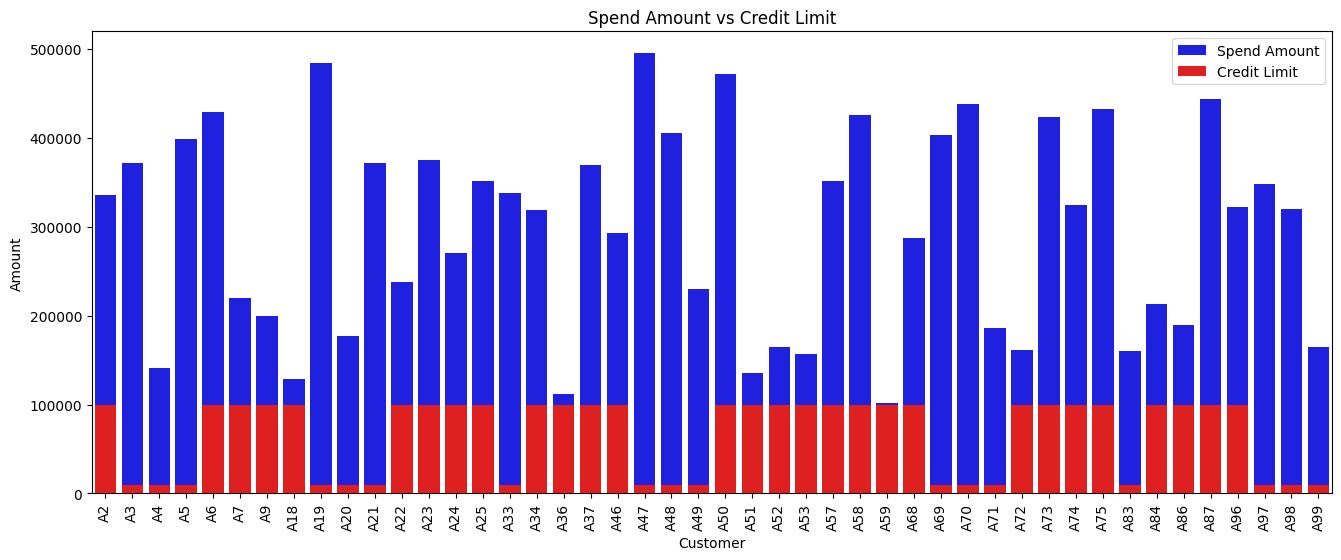

In [413]:
plt.figure(figsize=(16,6))
sns.barplot(data = Over_Limit, x = 'Customer', y = df1.loc[common_index, 'Amount'] , color= 'blue', label = 'Spend Amount' )
sns.barplot(data = Over_Limit , x = 'Customer', y = 'Limit', color = 'red', label = 'Credit Limit' )
plt.xlabel('Customer')
plt.ylabel('Amount')
plt.title('Spend Amount vs Credit Limit')
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [414]:
common_index = df.index.intersection(df1.index).intersection(df2.index)


In [415]:
customer_acquisition = pd.read_excel(file_path, sheet_name='Customer Acqusition')
spend = pd.read_excel(file_path, sheet_name='Spend')
repayment = pd.read_excel(file_path, sheet_name='Repayment')

In [416]:
# task 1 Monthly spend of each customer
spend['Month'] = pd.to_datetime(spend['Month'], format='%d-%b-%y')
spend['Month_Number'] = spend['Month'].dt.month
print(spend.columns)
monthly_spend = spend.groupby(['Costomer', 'Month_Number'])['Amount'].sum().reset_index()
monthly_spend.columns = ['Customer', 'Month', 'TotalSpend']
print(monthly_spend)

Index(['Sl No:', 'Costomer', 'Month', 'Type', 'Amount', 'Month_Number'], dtype='object')
    Customer  Month    TotalSpend
0         A1      1  1.909577e+06
1         A1      2  1.445574e+06
2         A1      4  5.645069e+05
3         A1      5  1.311966e+05
4         A1      8  1.293883e+05
..       ...    ...           ...
573      A95      1  3.478339e+05
574      A96      1  3.203635e+05
575      A97      1  1.643300e+05
576      A98      1  8.748351e+04
577      A99      1  4.760204e+05

[578 rows x 3 columns]


In [417]:
# task--- 2. Monthly Repayment of each customer
repayment['Month'] = pd.to_datetime(repayment['Month'], format='%d-%b-%y')
repayment['Month_Number'] = repayment['Month'].dt.month
print(repayment_column)
if 'Costomer' in repayment.columns:
    repayment.rename(columns={'Costomer': 'Customer'}, inplace=True)
monthly_repayment = repayment.groupby(['Customer', 'Month_Number'])['Amount'].sum().reset_index()
monthly_repayment.columns = ['Customer', 'Month', 'TotalRepayment']

Repayment


In [418]:
print(monthly_repayment)

    Customer  Month  TotalRepayment
0         A1      1    1.364357e+06
1         A1      2    1.390988e+06
2         A1      4    3.712733e+05
3         A1      7    3.005817e+05
4         A1      9    1.083201e+05
..       ...    ...             ...
553      A95      1    7.510949e+04
554      A96      1    1.101390e+05
555      A97      1    1.746064e+05
556      A98      1    9.780260e+04
557      A99      1    3.585899e+05

[558 rows x 3 columns]


In [419]:
# tasK-3. Highest Paying (10 Customers)
highest_paying_customers = spend.groupby('Costomer')['Amount'].sum().nlargest(10).reset_index()
highest_paying_customers.columns = ['Customer', 'TotalSpend']
print(highest_paying_customers)

  Customer    TotalSpend
0      A22  9.637819e+06
1      A40  9.595040e+06
2      A60  9.317672e+06
3      A61  9.148468e+06
4      A48  9.056652e+06
5      A42  8.665639e+06
6      A41  8.583532e+06
7      A39  8.526678e+06
8      A45  8.498612e+06
9      A13  8.042339e+06


In [420]:
 # task_4. Segment Spending Analysis
print("Columns in 'spend':", spend.columns)
print("Columns in'customer_acquisition':", customer_acquisition.columns)

Columns in 'spend': Index(['Sl No:', 'Costomer', 'Month', 'Type', 'Amount', 'Month_Number'], dtype='object')
Columns in'customer_acquisition': Index(['Sl No:', 'Customer', 'Age', 'City', 'Credit Card Product', 'Limit',
       'Company', 'Segment'],
      dtype='object')


In [421]:
if'Costomer'in spend.columns:
    spend.rename(columns={'Costomer': 'Customer'}, inplace=True)
segment_spend =spend.merge(customer_acquisition, on='Customer').groupby('Segment')['Amount'].sum().reset_index()
segment_spend.columns = ['Segment', 'TotalSpend']

In [422]:
print(segment_spend)

         Segment    TotalSpend
0           Govt  6.732563e+07
1  Normal Salary  1.077071e+08
2   Salaried_MNC  6.363949e+07
3   Salaried_Pvt  7.170431e+07
4  Self Employed  7.097548e+07


In [423]:
#task-5. Age Group Spending Analysis
customer_acquisition['AgeGroup'] = pd.cut(customer_acquisition['Age'], bins=[0, 18, 30, 45, 60, np.inf], labels=['Under 18', '18-30', '31-45', '46-60', 'Above 60'])
age_group_spend = spend.merge(customer_acquisition, on='Customer').groupby('AgeGroup', observed=False)['Amount'].sum().reset_index()
age_group_spend.columns = ['AgeGroup', 'TotalSpend']


In [424]:
print(age_group_spend)

   AgeGroup    TotalSpend
0  Under 18  9.343332e+07
1     18-30  4.608874e+07
2     31-45  4.448938e+07
3     46-60  6.324542e+07
4  Above 60  1.340952e+08


In [425]:
# task - 6. Most Profitable Segment
profit_per_segment = spend.merge(customer_acquisition, on='Customer').merge(repayment, on=['Customer', 'Month'], how='left', suffixes=('_Spend', '_Repayment'))
profit_per_segment['Amount_Repayment'] = profit_per_segment['Amount_Repayment'].fillna(0)
profit_per_segment['Profit'] = profit_per_segment['Amount_Spend'] - profit_per_segment['Amount_Repayment']

profit_per_segment = profit_per_segment.groupby('Segment')['Profit'].sum().reset_index()

print(profit_per_segment)

         Segment        Profit
0           Govt  3.604456e+07
1  Normal Salary  6.727540e+07
2   Salaried_MNC  3.413070e+07
3   Salaried_Pvt  4.844256e+07
4  Self Employed  3.848989e+07


In [426]:
# task 7. Category Spending Analysis
category_spend = spend.groupby('Type')['Amount'].sum().reset_index()
category_spend.columns = ['Type', 'TotalSpend']
print(category_spend)

            Type    TotalSpend
0     AIR TICKET  3.743547e+07
1           AUTO  1.050509e+07
2           BIKE  1.315264e+07
3     BUS TICKET  2.490590e+07
4         CAMERA  4.372101e+07
5            CAR  7.018278e+06
6        CLOTHES  2.479110e+07
7           FOOD  3.829646e+07
8      JEWELLERY  2.524795e+07
9   MOVIE TICKET  1.878458e+07
10         PETRO  5.102258e+07
11        RENTAL  2.091467e+07
12       SANDALS  6.325017e+06
13      SHOPPING  2.741868e+07
14  TRAIN TICKET  3.181262e+07


In [427]:
# Task 8. Interest Due Calculation
interest_due = spend.merge(repayment, on=['Customer', 'Month'], how='left', suffixes=('_Spend', '_Repayment'))

interest_due['Amount_Repayment'] = interest_due['Amount_Repayment'].fillna(0)

interest_due['InterestDue'] = (interest_due['Amount_Spend'] - interest_due['Amount_Repayment']) * 0.029

interest_due = interest_due.groupby('Customer')['InterestDue'].sum().reset_index()

print(interest_due)


   Customer    InterestDue
0        A1   57583.232753
1       A10   42537.575757
2      A100   -3157.728813
3       A11   80296.055227
4       A12  133412.303674
..      ...            ...
95      A95    7909.007232
96      A96    6096.511125
97      A97    -298.014150
98      A98    -299.253523
99      A99    3405.483407

[100 rows x 2 columns]


In [428]:
# Task 9. Monthly profit for the bank
monthly_profit = spend.merge(repayment, on=['Customer', 'Month'], how='left', suffixes=('_Spend', '_Repayment'))
monthly_profit['Amount_Repayment'].fillna(0)
monthly_profit['Profit'] = monthly_profit['Amount_Spend'] - monthly_profit['Amount_Repayment']
monthly_profit['Month_Number'] = monthly_profit['Month'].dt.month
monthly_profit = monthly_profit.groupby('Month_Number')['Profit'].sum().reset_index()
monthly_profit.columns = ['Month', 'Profit']
print(monthly_profit)

    Month        Profit
0       1  3.349224e+06
1       2  2.147069e+06
2       3 -4.968624e+05
3       4  5.540681e+05
4       5  6.490976e+06
5       6 -9.329240e+05
6       7 -5.744332e+05
7       8  4.515329e+04
8       9 -6.207402e+05
9      10  3.572320e+04
10     11  3.928311e+05
11     12 -1.298549e+06


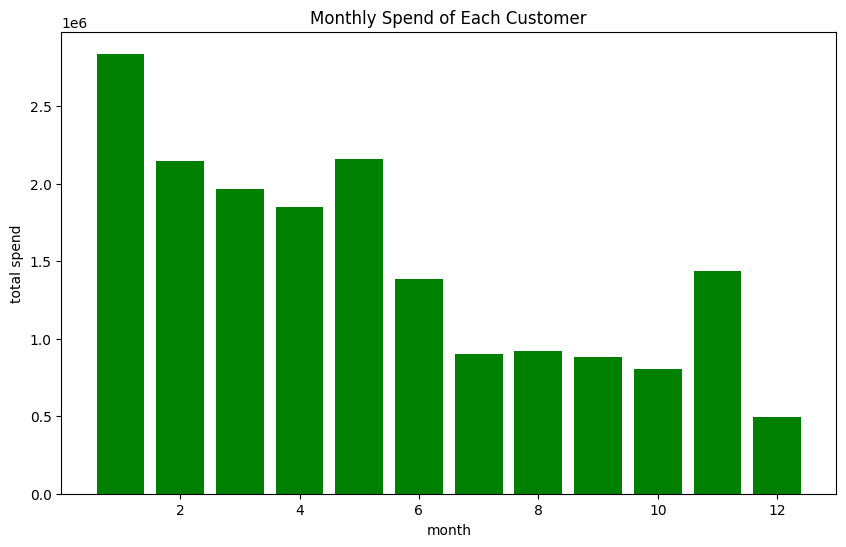

In [434]:
# Visualization
plt.figure(figsize=(10, 6))
plt.bar(monthly_spend['Month'], monthly_spend['TotalSpend'], color='green')
plt.xlabel('month')
plt.ylabel('total spend')
plt.title('Monthly Spend of Each Customer')
plt.show()